In [1]:
#Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\abalone.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data=pd.read_csv(path,encoding='ascii')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#lets know about the data

In [5]:
data.shape #We see it is having 4177 rows and 7 columns

(4177, 9)

In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
#The data looks good we dont see any missing values and the data looks good


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
#here we see the data as :-
#1) Sex it is an object which we need to encode to convert it to digits.
#2) Others all are as floats
#3) Rings is an integer
#4) We also observe that there are no Null values present in the data set.

In [10]:
data = pd.get_dummies(data)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


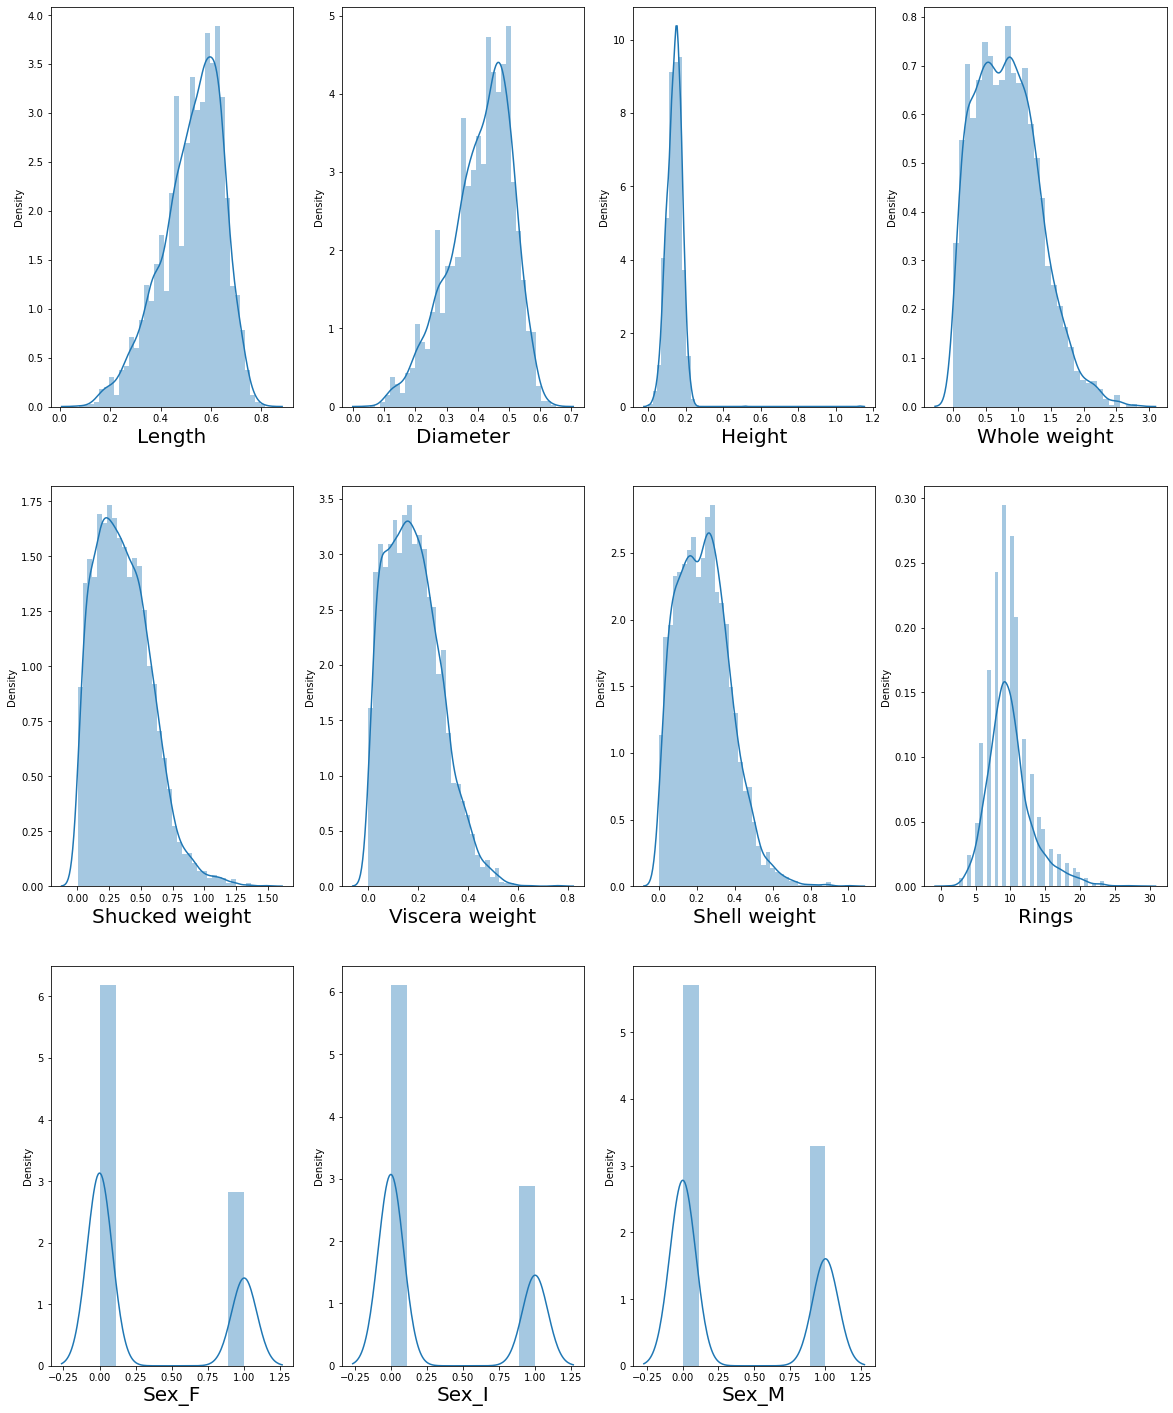

In [11]:
#Lets check how the data is distributed for every coulumn
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

<AxesSubplot:>

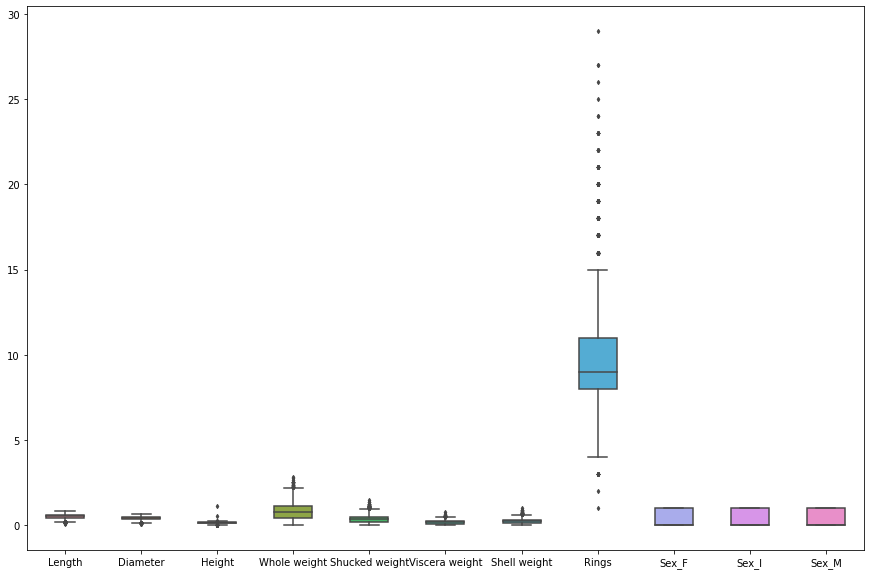

In [12]:
#Lets check if it has got some outliers
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width = 0.5,ax=ax,fliersize=3)

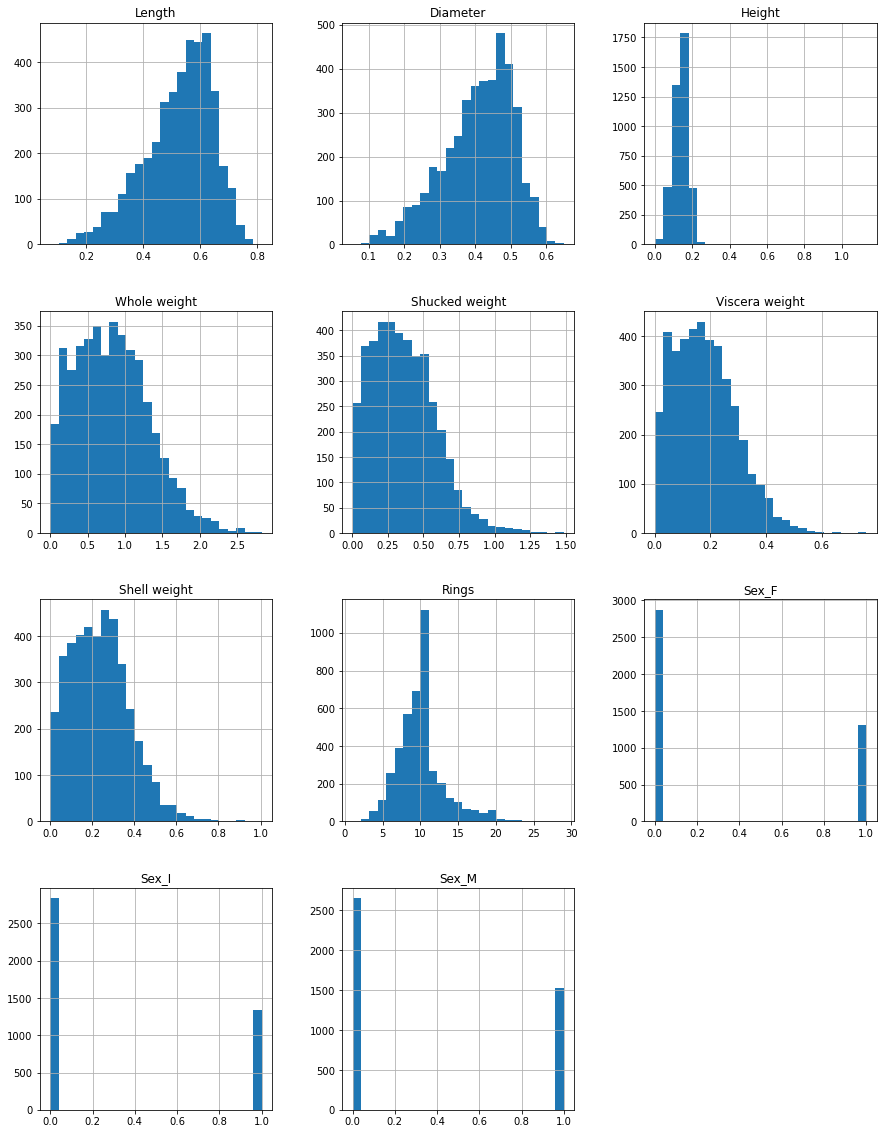

In [13]:
#Visualising the the feature on that of the label
data.hist(figsize=(15,20) , bins = 25)
plt.show()

In [14]:
#Lets split the data to features and labels for the better understanding :


In [15]:

x = data.drop(columns="Rings")
y = data["Rings"]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
x_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.44898585, -1.439929  , -1.18397831, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32665906, ..., -0.67483383,
        -0.68801788,  1.31667716]])

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=21)

# Using Randomized Forrest

In [19]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clf=RandomForestClassifier()

params = {'n_estimators' : [13,15],
         'criterion' : ['entropy'],
         'max_depth': [10,15],
         'min_samples_split' : [10,11],
         'min_samples_leaf' : [5,6]
         }
grd= GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params =>',grd.best_params_)

clf=grd.best_estimator_ #reinstantiating with best params

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print('conf_mat = >','\n',rf_conf_mat)
print('Accuracy rf Normal =====>',accuracy_score(y_test,y_pred))

best_params => {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}
conf_mat = > 
 [[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  9  9  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  9 11 40  8  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 13 29 28 14  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  4 32 41 40 19  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 14 34 70 27 16  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 15 59 56 23  4  5  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4 25 37 26  5  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5 17 16 21  6  2  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  7 16 16  2  5  1  0  0  0  0  0  0  0  0  0 

In [20]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.39      0.50      0.44        14
           5       0.31      0.29      0.30        31
           6       0.26      0.14      0.18        78
           7       0.22      0.32      0.26        90
           8       0.29      0.28      0.29       144
           9       0.26      0.42      0.32       167
          10       0.28      0.34      0.31       167
          11       0.20      0.25      0.22       105
          12       0.17      0.08      0.11        71
          13       0.20      0.10      0.13        50
          14       0.25      0.11      0.15        28
          15       0.00      0.00      0.00        22
          16       0.29      0.12      0.17        16
          17       0.00      0.00      0.00        21
          18       0.00      0.00      0.00        12
          19       0.00    

# Using KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.21722488038277513

In [23]:
#Using bagging over KNN and see if the score improves
from sklearn.ensemble import BaggingClassifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators = 10, max_samples = 0.5,
                           bootstrap=True, random_state=3, oob_score=True)

In [24]:
#LEts check for the Out of Bag (OOB) score
bag_knn.oob_score

True

In [25]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators = 10, max_samples = 0.5,
                           bootstrap=False, random_state=3)

In [26]:
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.22775119617224882

In [27]:
#Upon checking after using the Bagging the data seems to be better.

# Decission Tree

In [ ]:
# from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [ ]:
#Trainning with all classifiers

lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)

print('All models are trained')

In [ ]:
#All models score captured
lr.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
print('All models score is captured ')

In [ ]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

In [ ]:
#Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

In [ ]:
#KNeighbors Classifier
roc_auc_score(y_test,kn.predict(x_test))

In [ ]:
#Decision Tree CLassifier
roc_auc_score(y_test,dt.predict(x_test))

In [ ]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)   #ax_ = Axies with confusion matrix
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()